In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#グラフ設定
plt.figure(figsize=(20,10))
sns.set()
sns.set_style("darkgrid", {'grid.linestyle': '-'})

<Figure size 1440x720 with 0 Axes>

In [2]:
data = pd.read_csv('garasu.csv',encoding='sjis')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 5 columns):
num      852 non-null int64
like     852 non-null int64
sold     852 non-null int64
price    852 non-null int64
title    852 non-null object
dtypes: int64(4), object(1)
memory usage: 33.4+ KB


In [3]:
#タイトルによってデータを削除
#価格が10000以上のものも削除
data = data[data['title'].str.contains('乃木坂')==False]
data = data[data['title'].str.contains('セット')==False]
data = data[data['title'].str.contains('二種')==False]
data = data[data['title'].str.contains('グッズ')==False]
data = data[data['title'].str.contains('まとめ')==False]
data = data[data['title'].str.contains('券')==False]
data = data[data['title'].str.contains('シンクロニシティ')==False]
data = data[data['title'].str.contains('生写真')==False]
data = data[data['title'].str.contains('BRODY')==False]
data = data[data['title'].str.contains('専用')==False]
data = data[data['title'].str.contains('通常版')==False]
data = data[data['title'].str.contains('コンプ')==False]
data = data[data['title'].str.contains('アルバム')==False]
data = data[data['title'].str.contains('告知')==False]
data = data[data['title'].str.contains('広告')==False]
data = data[data['price']<10000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 26 to 850
Data columns (total 5 columns):
num      709 non-null int64
like     709 non-null int64
sold     709 non-null int64
price    709 non-null int64
title    709 non-null object
dtypes: int64(4), object(1)
memory usage: 33.2+ KB


In [4]:
data.describe()

,num,like,sold,price
count,709.000000,709.000000,709.000000,709.000000
mean,441.521862,3.121298,0.644570,2137.328632
std,235.672289,3.533450,0.478981,1258.147476
min,26.000000,0.000000,0.000000,320.000000
25%,240.000000,1.000000,0.000000,1111.000000
50%,438.000000,2.000000,1.000000,1777.000000
75%,647.000000,4.000000,1.000000,2999.000000
max,850.000000,38.000000,1.000000,8000.000000


In [5]:
data.corr()

,num,like,sold,price
num,1.000000,-0.228820,-0.113756,-0.925733
like,-0.228820,1.000000,-0.029570,0.189083
sold,-0.113756,-0.029570,1.000000,0.064739
price,-0.925733,0.189083,0.064739,1.000000


C:\Users\ecusa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


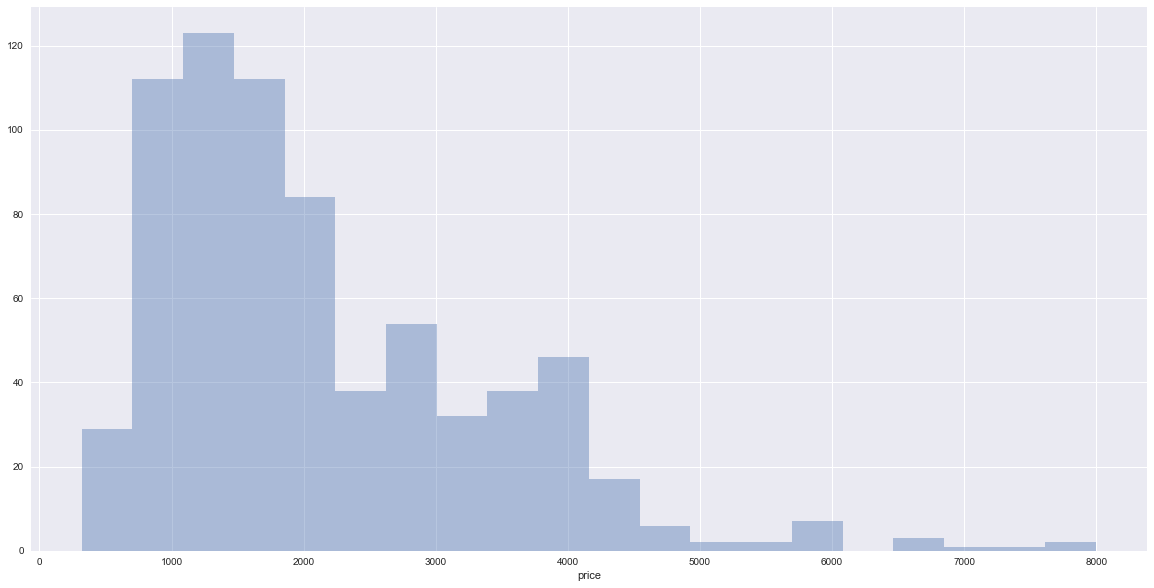

In [6]:
plt.figure(figsize=(20,10))
sns.distplot(data.price,kde=False,bins=20,)

C:\Users\ecusa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ecusa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1440x720 with 0 Axes>

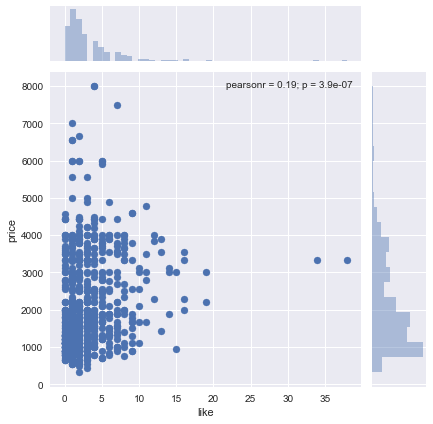

In [7]:
plt.figure(figsize=(20,10))
sns.jointplot('like','price',data=data)

In [8]:
like_over = data[data['like']>30]
like_over.head()

,num,like,sold,price,title
195,195,38,0,3333,欅坂46オーダーメイドスマホケース、手帳型可能
202,202,34,1,3333,欅坂46 平手友梨奈 ガラスを割れ ポスター 会場限定


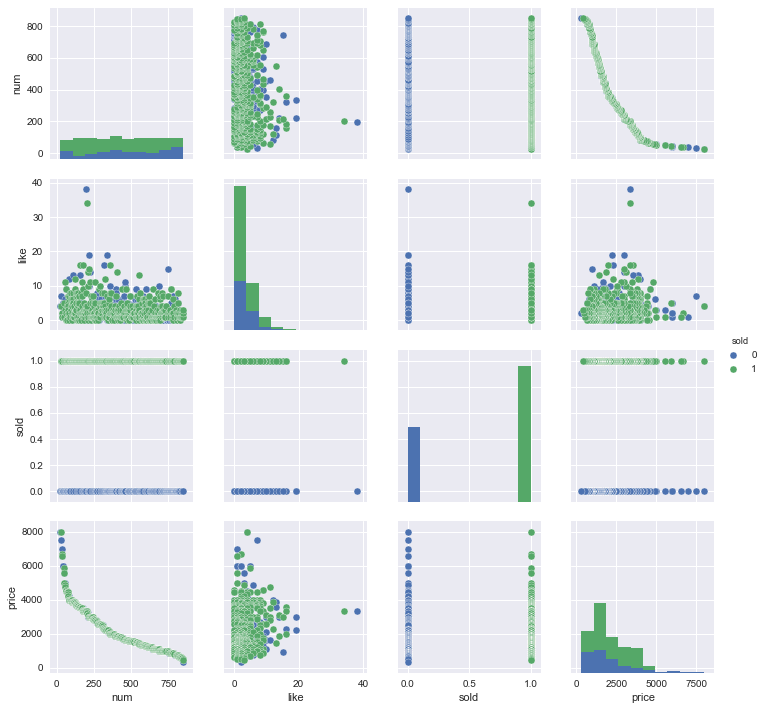

In [9]:
sns.pairplot(data,hue='sold')

<Figure size 720x720 with 0 Axes>

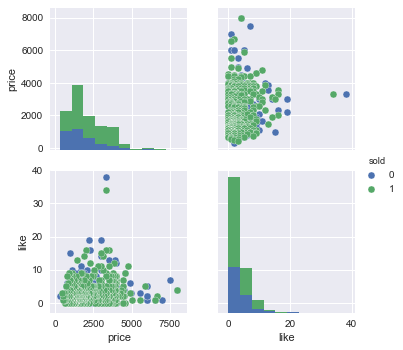

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(data,hue='sold',vars=['price','like'])

In [11]:
#千円単位で分割
print(data.groupby('sold')['price'].describe())
sold = data[data['sold']==1]
not_sold = data[data['sold']==0]
sold_count = pd.cut(sold.price.sort_values(),[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]).value_counts(sort=False)
not_sold_count = pd.cut(not_sold.price,[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]).value_counts(sort=False)
data['price_cat'] = data['price']//1000

      count         mean          std    min     25%     50%     75%     max
sold                                                                        
0     252.0  2027.718254  1385.599606  320.0   999.0  1666.0  2500.0  8000.0
1     457.0  2197.770241  1179.251763  450.0  1222.0  1800.0  3000.0  8000.0


In [12]:
sold_count

(0, 1000]         70
(1000, 2000]     189
(2000, 3000]      84
(3000, 4000]      93
(4000, 5000]      16
(5000, 6000]       2
(6000, 7000]       2
(7000, 8000]       1
(8000, 9000]       0
(9000, 10000]      0
Name: price, dtype: int64

In [13]:
not_sold_count

(0, 1000]        71
(1000, 2000]     99
(2000, 3000]     39
(3000, 4000]     22
(4000, 5000]     10
(5000, 6000]      7
(6000, 7000]      2
(7000, 8000]      2
(8000, 9000]      0
(9000, 10000]     0
Name: price, dtype: int64

In [14]:
sold_rate = []
not_sold_rate = []
for i in range(8):
    sum = sold_count.iloc[i] + not_sold_count.iloc[i]
    rate = sold_count.iloc[i] / sum
    sold_rate.append(rate)
    rete = not_sold_count.iloc[i] /sum
    not_sold_rate.append(rete)

Text(0.5,1,'Selling rate')

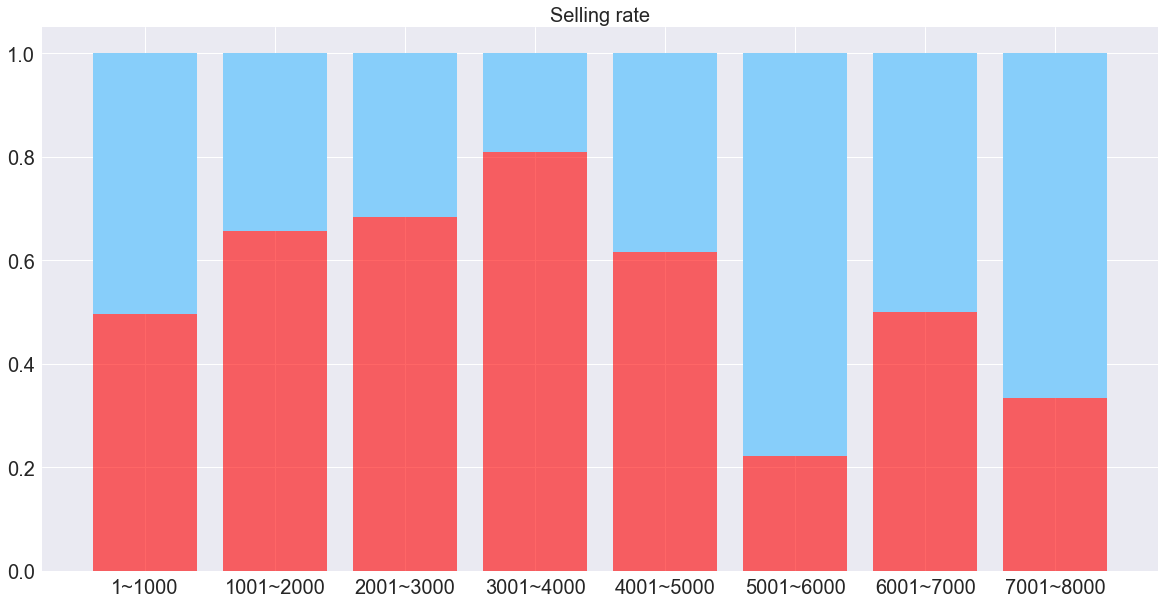

In [15]:
#売却率をグラフに表す
plt.figure(figsize=(20,10))
plt.bar([i for i in range(8)],sold_rate,color='r',alpha=0.6)
plt.bar([i for i in range(8)],not_sold_rate,bottom=sold_rate,color='lightskyblue')
plt.xticks([i for i in range(8)],[str(i*1000+1)+'~'+str((i+1)*1000) for i in range(8)],fontsize=20)
plt.yticks(fontsize=20)
plt.title('Selling rate',fontsize=20)


In [16]:
#5000~6000の値段の商品を見てみる
data_5_6 = data[data['price'] >5000][data['price']<=6000]

C:\Users\ecusa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5555円のかとしはコメントを見るからにまとめ買いである可能性が高い

In [17]:
data_5_6

,num,like,sold,price,title,price_cat
41,41,1,0,6000,平手友梨奈 ガラスを割れポスター,6
42,42,1,0,6000,欅坂46 6th ガラスを割れ 渡邉理佐 B2ポスター,6
43,43,2,0,6000,加藤史帆 齊藤京子 高本彩花 佐々木久美 ポスター ひらがなけやき,6
44,44,5,0,6000,欅坂46 長濱ねる ガラスを割れ！ポスター,6
45,45,2,0,5999,欅坂46 ひらがなけやき ポスター ガラスを割れ,5
46,46,5,0,5999,欅坂46 長濱ねる ガラスを割れ!ポスター,5
47,47,5,1,5900,欅坂46 ガラスを割れ 今泉佑唯 ポスター,5
50,50,1,1,5555,欅坂46 加藤史帆 ポスター,5
51,51,3,0,5555,欅坂46 ポスター ガラスを割れ,5


In [18]:
data.groupby(['price_cat','sold'])['price_cat'].count()

price_cat  sold
0          0        68
           1        55
1          0        99
           1       195
2          0        36
           1        82
3          0        22
           1        94
4          0        16
           1        25
5          0         3
           1         3
6          0         5
           1         2
7          0         2
8          0         1
           1         1
Name: price_cat, dtype: int64

In [19]:
#ピボットテーブル
data.pivot_table(index='sold',columns='price_cat',values='price',aggfunc=len,dropna=False)

price_cat,0,1,2,3,4,5,6,7,8
sold,,,,,,,,,
0,68.0,99.0,36.0,22.0,16.0,3.0,5.0,2.0,1.0
1,55.0,195.0,82.0,94.0,25.0,3.0,2.0,NaN,1.0


In [20]:
#risaを含むやつ
risa = data[data['title'].str.contains('渡邉理佐')==True]
#売れているもののみ
risa_sold = risa[risa['sold']==1]
risa_sold.describe()

,num,like,sold,price,price_cat
count,21.000000,21.000000,21.0,21.000000,21.000000
mean,138.952381,2.761905,1.0,3724.000000,3.142857
std,54.083709,2.488067,0.0,464.822869,0.573212
min,64.000000,0.000000,1.0,2800.000000,2.000000
25%,106.000000,1.000000,1.0,3400.000000,3.000000
50%,122.000000,2.000000,1.0,3800.000000,3.000000
75%,176.000000,4.000000,1.0,3900.000000,3.000000
max,256.000000,11.000000,1.0,4555.000000,4.000000


In [21]:
#zuuを含むやつ
zuu = data[data['title'].str.contains('今泉佑唯')==True]
#売れているもののみ
zuu_sold = zuu[zuu['sold']==1]
zuu_sold.describe()

,num,like,sold,price,price_cat
count,29.000000,29.000000,29.0,29.000000,29.000000
mean,119.241379,3.517241,1.0,4013.275862,3.517241
std,60.061668,3.631417,0.0,791.423667,0.828971
min,38.000000,0.000000,1.0,2600.000000,2.000000
25%,78.000000,1.000000,1.0,3555.000000,3.000000
50%,104.000000,3.000000,1.0,3999.000000,3.000000
75%,150.000000,5.000000,1.0,4250.000000,4.000000
max,277.000000,16.000000,1.0,6555.000000,6.000000


In [22]:
#techiを含むやつ
techi = data[data['title'].str.contains('平手友梨奈')==True]
#売れているもののみ
techi_sold = techi[techi['sold']==1]
techi_sold.describe()

,num,like,sold,price,price_cat
count,28.000000,28.000000,28.0,28.000000,28.000000
mean,153.035714,6.642857,1.0,3709.714286,3.250000
std,58.363156,6.875691,0.0,754.696596,0.700529
min,36.000000,0.000000,1.0,2799.000000,2.000000
25%,118.500000,2.000000,1.0,3333.000000,3.000000
50%,155.500000,5.500000,1.0,3555.000000,3.000000
75%,201.250000,8.250000,1.0,3859.500000,3.000000
max,261.000000,34.000000,1.0,6666.000000,6.000000


In [23]:
#neruを含むやつ
neru = data[data['title'].str.contains('長濱ねる')==True]
#売れているもののみ
neru_sold = neru[neru['sold']==1]
neru_sold.describe()

,num,like,sold,price,price_cat
count,20.000000,20.000000,20.0,20.000000,20.00000
mean,186.400000,4.600000,1.0,3354.100000,2.75000
std,56.053921,3.789181,0.0,408.130384,0.55012
min,86.000000,0.000000,1.0,2800.000000,2.00000
25%,133.750000,1.000000,1.0,2999.000000,2.00000
50%,183.500000,4.000000,1.0,3416.500000,3.00000
75%,239.500000,7.000000,1.0,3719.250000,3.00000
max,260.000000,14.000000,1.0,4000.000000,4.00000


In [24]:
#yukaを含むやつ
yuka = data[data['title'].str.contains('菅井友香')==True]
#売れているもののみ
yuka_sold = yuka[yuka['sold']==1]
yuka_sold.describe()

,num,like,sold,price,price_cat
count,18.000000,18.000000,18.0,18.000000,18.000000
mean,248.944444,3.055556,1.0,2900.611111,2.333333
std,50.728194,2.127474,0.0,387.686067,0.485071
min,142.000000,0.000000,1.0,2299.000000,2.000000
25%,201.000000,2.000000,1.0,2555.000000,2.000000
50%,256.000000,3.000000,1.0,2831.500000,2.000000
75%,291.750000,3.750000,1.0,3305.250000,3.000000
max,325.000000,10.000000,1.0,3666.000000,3.000000


In [25]:
#rikaを含むやつ
rika = data[data['title'].str.contains('渡辺梨加')==True]
#売れているもののみ
rika_sold = rika[rika['sold']==1]
rika_sold.describe()

,num,like,sold,price,price_cat
count,18.000000,18.000000,18.0,18.000000,18.000000
mean,274.111111,4.055556,1.0,2677.722222,2.166667
std,54.865492,3.811318,0.0,409.563872,0.383482
min,146.000000,0.000000,1.0,2000.000000,2.000000
25%,246.250000,1.000000,1.0,2500.000000,2.000000
50%,279.500000,2.500000,1.0,2599.500000,2.000000
75%,304.750000,6.500000,1.0,2888.000000,2.000000
max,371.000000,12.000000,1.0,3666.000000,3.000000


In [26]:
#ponを含むやつ
pon = data[data['title'].str.contains('小林由依')==True]
#売れているもののみ
pon_sold = pon[pon['sold']==1]
pon_sold.describe()

,num,like,sold,price,price_cat
count,17.000000,17.000000,17.0,17.000000,17.000000
mean,177.588235,3.117647,1.0,3395.058824,3.000000
std,55.797691,3.100047,0.0,418.298558,0.353553
min,82.000000,0.000000,1.0,2444.000000,2.000000
25%,143.000000,1.000000,1.0,3111.000000,3.000000
50%,186.000000,2.000000,1.0,3333.000000,3.000000
75%,210.000000,5.000000,1.0,3666.000000,3.000000
max,310.000000,10.000000,1.0,4111.000000,4.000000


(1500, 7000)

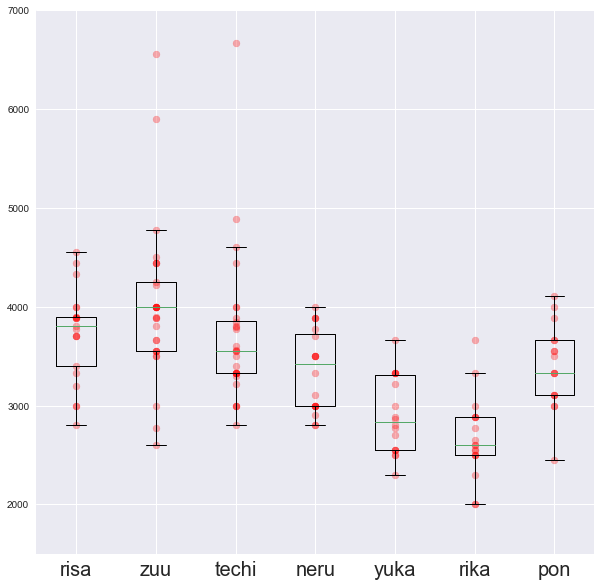

In [27]:
plt.figure(figsize=(10,10))
dataes = [risa,zuu,techi,neru,yuka,rika,pon]
for num,data in enumerate(dataes):
    plt.scatter([num+1 for i in range(len(data[data['sold']==1].price))],data[data['sold']==1].price,c='r',alpha=0.3)
plt.boxplot([risa_sold.price,zuu_sold.price,techi_sold.price,neru_sold.price,yuka_sold.price,rika_sold.price,pon_sold.price])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['risa','zuu','techi','neru','yuka','rika','pon'],fontsize=20)
plt.ylim(1500,7000)

In [28]:
#平均値の差の検定
for data in dataes:
    data_sold = data[data['sold']==1]['price']
    data_not_sold = data[data['sold']==0]['price']
    mean_diff = abs(data_not_sold.mean()-data_sold.mean())
    sigma = np.sqrt(data_not_sold.std()/len(data_not_sold)+data_sold.std()/len(data_sold))
    if mean_diff > sigma*2:
        print('：有意')
    else:
        print('：有意な差なし')

：有意
：有意
：有意
：有意
：有意
：有意な差なし
：有意な差なし


In [29]:
rika

,num,like,sold,price,title,price_cat
146,146,5,1,3666,風に吹かれても 会場 ポスター 欅坂46 渡辺梨加,3
188,188,1,1,3333,欅坂46 渡辺梨加 ガラスを割れ ポスター,3
189,189,2,0,3333,欅坂46 渡辺梨加 ポスター,3
225,225,11,1,3000,欅坂46 ポスター 渡辺梨加,3
245,245,1,1,2888,渡辺梨加 欅坂 ガラスを割れ！ ポスター 会場限定,2
246,246,7,1,2888,欅坂46 渡辺梨加 ポスター,2
247,247,1,1,2888,欅坂46 渡辺梨加 ポスター,2
263,263,0,1,2777,渡辺梨加 ポスター,2
275,275,2,1,2650,欅坂46 ガラスを割れ！ 渡辺梨加 ポスター,2
279,279,3,1,2600,欅坂46 渡辺梨加 ガラスを割れ 未使用ポスター 全国握手会会場限定,2


In [30]:
pon

,num,like,sold,price,title,price_cat
82,82,2,1,4111,欅坂46 小林由依 ポスター ガラスを割れ,4
102,102,2,1,3999,小林由依 ガラスを割れ！ ポスター,3
112,112,5,1,3888,欅坂46 ポスター ガラスを割れ 小林由依,3
140,140,8,1,3666,欅坂46 小林由依 ポスター,3
143,143,1,1,3666,欅坂46小林由依ポスター,3
152,152,7,1,3555,小林由依 ポスター,3
155,155,1,1,3555,欅坂46 小林由依 ポスター,3
164,164,0,1,3500,ポスター小林由依,3
181,181,2,0,3333,欅坂46 小林由依 ガラスを割れ！ポスター,3
186,186,1,1,3333,欅坂46 小林由依 ポスター,3


- メンバーごとのヒストグラム
- 上位メンをまとめた時に売れている奴と売れていないやつの価格に差はあるのか